ct:  0.012566370614359171
nu_star:  3.13879508118284
beta:  0.7583837855257606
z0_WF:  4.333933042511133
ct:  0.003141592653589793
nu_star:  1.56939754059142
beta:  0.6108037062377581
z0_WF:  0.23568827613865057
u_d:  1.5974489353782397
ct:  0.005585053606381854
nu_star:  2.092530054121893
beta:  0.6766401675976778
z0_WF:  0.9155236192094567


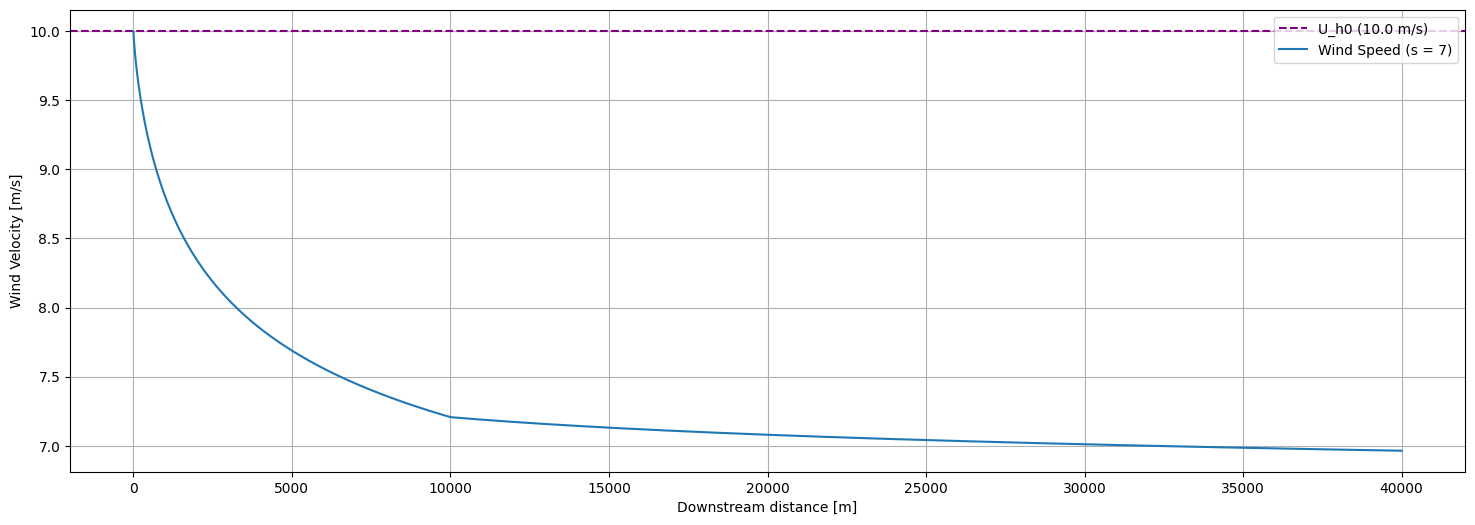

In [21]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, nsolve, log

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0):

    f = 1*10**(-4) # Coriolis parameter [1/s]
    k = 0.4 # Von Karman constant [-]
    z_0lo = 0.0001 # surface rughness length [m]

    ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
    print("ct: ", ct)
    nu_star = 28 * np.sqrt(ct)
    print("nu_star: ", nu_star)
    beta =  nu_star / (1 + nu_star)
    print("beta: ", beta)
    z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
    print("z0_WF: ", z0_WF)

    x1 = x1
    x2 = x2
    x3 = x3
    x = np.linspace(x1, x2, x2)

    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)

    h1[x > x1] = z_h + ((x[x > x1]) / z0_WF)**(4/5)
    h2[x > x2] = ((x[x>x2]-x2)/z0_WF)**(4/5)

    uw = np.full_like(x, np.nan, dtype=float)

    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)) / (np.log(h1[idx1] / z0_WF) * np.log(z_h/z_0lo))

    #idx2 = (x > x2) & (h2 >= z_h)
    #uw[idx2] = U_h0 * (np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)) / (np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo))

    return x, uw, U_h0, uw[-1]

# calculate_wind_speed(x1, x2, x3, z_h, D, ct, s_x, s_y, U_G, C_star):
x_1, uw_1, U_h0_1, U_end_1 = calculate_wind_speed(0, 10000, 40001, 100, 100, 0.8, 5, 5, 10)

# Second calculation
x_2, uw_2, U_h0_2, U_end_2 = calculate_wind_speed(0, 40000, 40001, 100, 100, 0.8, 10, 10, U_end_1)

# Now shift x_2 array
x_2_shifted = x_2 # + x_1[-1]

u_d = uw_1[-1] - uw_2[10000]

print("u_d: ", u_d)

for i in range(len(uw_2)):
    uw_2[i] = uw_2[i] + u_d

# Now concatenation will work
uw_concat = np.concatenate((uw_1, uw_2[10000:40000]))
x_concat = np.concatenate((x_1, x_2_shifted[10000:40000]))


x_3, uw_3, U_h0_3, U_end_3 = calculate_wind_speed(0, 40000, 40001, 100, 100, 0.8, 7.5, 7.5, 10)

# Plotting
plt.figure(figsize=(18, 6))
plt.axhline(y=U_h0_1, color='purple', linestyle='--', label='U_h0 (10.0 m/s)')
plt.plot(x_concat, uw_concat, label='Wind Speed (s = 7)', color='#1f77b4')
plt.xlabel('Downstream distance [m]')
plt.ylabel('Wind Velocity [m/s]')
#lt.ylim(6.0, 10.5)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

ct:  0.012566370614359171
nu_star:  3.13879508118284
beta:  0.7583837855257606
z0_WF:  4.333933042511133
ct:  0.003141592653589793
nu_star:  1.56939754059142
beta:  0.6108037062377581
z0_WF:  0.23568827613865057


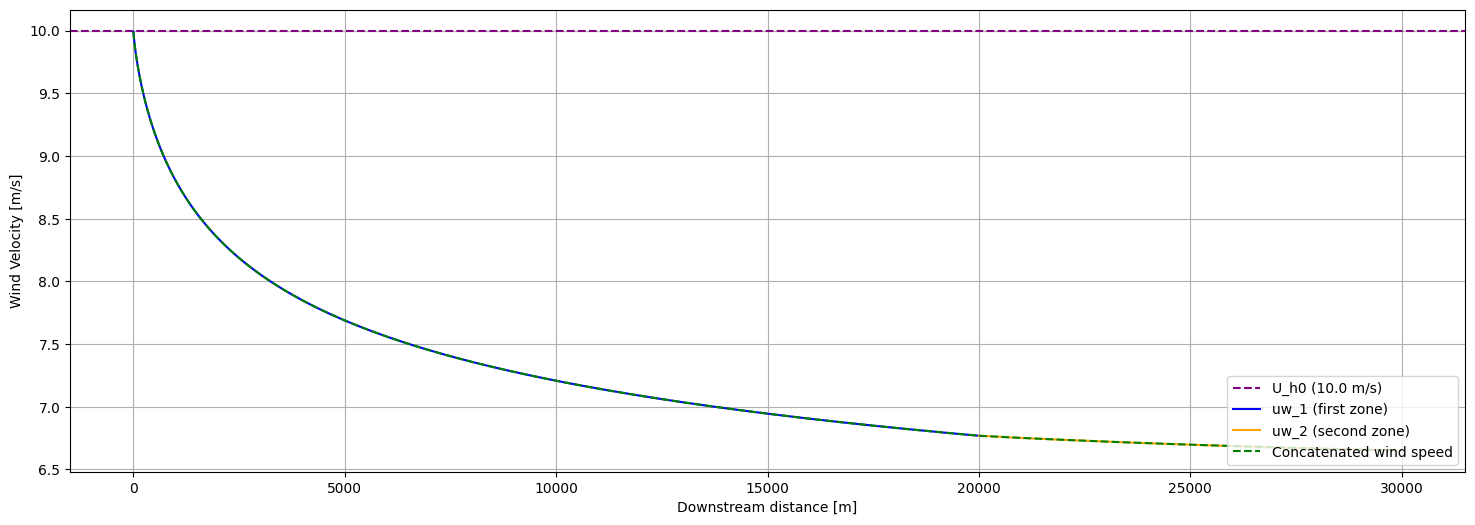

In [22]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, nsolve, log

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0):

    f = 1*10**(-4) # Coriolis parameter [1/s]
    k = 0.4 # Von Karman constant [-]
    z_0lo = 0.0001 # surface rughness length [m]

    ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
    print("ct: ", ct)
    nu_star = 28 * np.sqrt(ct)
    print("nu_star: ", nu_star)
    beta =  nu_star / (1 + nu_star)
    print("beta: ", beta)
    z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
    print("z0_WF: ", z0_WF)

    x1 = x1
    x2 = x2
    x3 = x3
    x = np.linspace(x1, x2, x2)

    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)

    h1[x > x1] = z_h + ((x[x > x1]) / z0_WF)**(4/5)
    h2[x > x2] = ((x[x>x2]-x2)/z0_WF)**(4/5)

    uw = np.full_like(x, np.nan, dtype=float)

    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)) / (np.log(h1[idx1] / z0_WF) * np.log(z_h/z_0lo))

    #idx2 = (x > x2) & (h2 >= z_h)
    #uw[idx2] = U_h0 * (np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)) / (np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo))

    return x, uw, U_h0, uw[-1]

# Calculate first
x_1, uw_1, U_h0_1, U_end_1 = calculate_wind_speed(0, 20000, 40001, 100, 100, 0.8, 5, 5, 10)

# Calculate second
x_2, uw_2, U_h0_2, U_end_2 = calculate_wind_speed(0, 20000, 40001, 100, 100, 0.8, 10, 10, U_end_1)

# Shift uw_2 to match uw_1
u_d = uw_1[-1] - uw_2[10000]
uw_2 = uw_2 + u_d

# Shift x_2 so x_2[10000] aligns with x_1[-1]
shift_amount = x_1[-1] - x_2[10000]
x_2_shifted = x_2 + shift_amount

# Concatenate
uw_concat = np.concatenate((uw_1, uw_2[10000:]))
x_concat = np.concatenate((x_1, x_2_shifted[10000:]))

# Plot
plt.figure(figsize=(18, 6))
plt.axhline(y=U_h0_1, color='purple', linestyle='--', label='U_h0 (10.0 m/s)')
plt.plot(x_1, uw_1, label='uw_1 (first zone)', color='blue')
plt.plot(x_2_shifted[10000:], uw_2[10000:], label='uw_2 (second zone)', color='orange')
plt.plot(x_concat, uw_concat, label='Concatenated wind speed', color='green', linestyle='--')
plt.xlabel('Downstream distance [m]')
plt.ylabel('Wind Velocity [m/s]')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

